Use VotingClassifier( ) of sklearn library to create an ensemble model using Logistic regression, Gaussian NB and Random Forest classifiers. For VotingClassifier( ) show the use of voting parameter set to ‘soft’ and ‘hard’. Also make use of weight parameter. Compare and contrast your results.


In [3]:
#Importing diabetes dataset
import pandas as pd
diab_df=pd.read_csv("https://raw.githubusercontent.com/kajalpanda1/DatasetRepository/master/Diabetes.csv")

In [4]:
#Checking NULL values in dataset
diab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   insu    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [5]:
#Retrieving first five records of the dataset
diab_df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [6]:
#Extracting feature and target sets
feature_df=diab_df.iloc[:,:8]
target_df=diab_df.iloc[:,8]

In [7]:
feature_df.shape

(768, 8)

In [8]:
target_df.shape

(768,)

In [9]:
#Standardizing the features
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
feature_df=ss.fit_transform(feature_df)

In [50]:
#Splitting training and testing datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(feature_df,target_df,test_size=0.15,random_state=30)

In [51]:
#Implementing LogisticRegresson model
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression(solver='liblinear',C=0.01)

In [52]:
#Implementing GaussianNaiveBayesClassifier model
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

In [53]:
#Implementing RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=500,max_depth=4)

In [75]:
#HARD VOTING ENSEMBLE CLASSIFIER
from sklearn.ensemble import VotingClassifier
estimators=[('Logistic Regression', lgr), ('Gausssian Naive Bayes', gnb), ('Random Forest Classifier', rfc)]
ensemble_hard=VotingClassifier(estimators, voting='hard', weights=[1,3,1])

#Fitting model with training instances
ensemble_hard.fit(x_train, y_train)

VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(C=0.01, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('Gausssian Naive Bayes',
                              GaussianNB(priors=None, var_smoothi...
                                                     criterion='gini',
                                                     max_depth=4,
       

In [77]:
#Training and testing accuracies of hard voting ensemble model
print('Training:',round(ensemble_hard.score(x_train,y_train)*100,4))
print('Testing:',round(ensemble_hard.score(x_test, y_test)*100,4))

Training: 75.9202
Testing: 78.4483


In [78]:
#Predicting test instances with hard voting ensemble model
y_predh=ensemble_hard.predict(x_test)

In [79]:
#Confusion matrix for hard voting ensemble classifier model
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predh)
conf_mat=pd.DataFrame(cm,index=['Positive','Negative'],columns=['PredictedPositive','PredictedNegative'])
conf_mat

,PredictedPositive,PredictedNegative
Positive,68,9
Negative,16,23


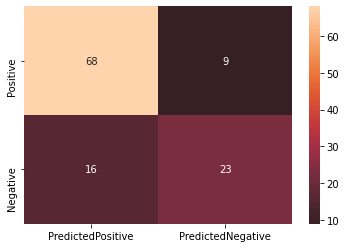

In [80]:
#Plotting confusion matrix using heatmap
import seaborn as sns
sns.heatmap(conf_mat, annot=True, center=0)

In [71]:
#SOFT VOTING ENSEMBLE CLASSIFIER
from sklearn.ensemble import VotingClassifier
estimators=[('Logistic Regression', lgr), ('Gausssian Naive Bayes', gnb), ('Random Forest Classifier', rfc)]
ensemble_soft=VotingClassifier(estimators, voting='soft',weights=[1,3,1])

#Fitting model with training instances
ensemble_soft.fit(x_train, y_train)

VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(C=0.01, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('Gausssian Naive Bayes',
                              GaussianNB(priors=None, var_smoothi...
                                                     criterion='gini',
                                                     max_depth=4,
       

In [81]:
#Training and test accuracies of soft voting ensemble model
print('Training:',round(ensemble_soft.score(x_train,y_train)*100,4))
print('Testing:',round(ensemble_soft.score(x_test, y_test)*100,4))

Training: 76.9939
Testing: 77.5862


In [82]:
#Predicting test instances with soft voting ensemble model
y_preds=ensemble_soft.predict(x_test)

In [85]:
#Confusion matrix for soft voting ensemble classifier model
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test,y_preds)
conf_mat1=pd.DataFrame(cm1,index=['Positive','Negative'],columns=['PredictedPositive','PredictedNegative'])
conf_mat1

,PredictedPositive,PredictedNegative
Positive,68,9
Negative,17,22


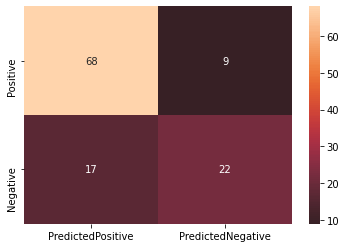

In [86]:
#Plotting confusion matrix using heatmap
import seaborn as sns
sns.heatmap(conf_mat, annot=True, center=0)